## **AutoEncoders**
An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error.

### **Required Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

### **Load the FMnist dataset**
The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

In [2]:
''' fmnist dataset '''
(X_train, _), (X_test, _) = fashion_mnist.load_data()

''' normalizing the pixel of the images '''
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

''' checking shape of images '''
print (X_train.shape)
print (X_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


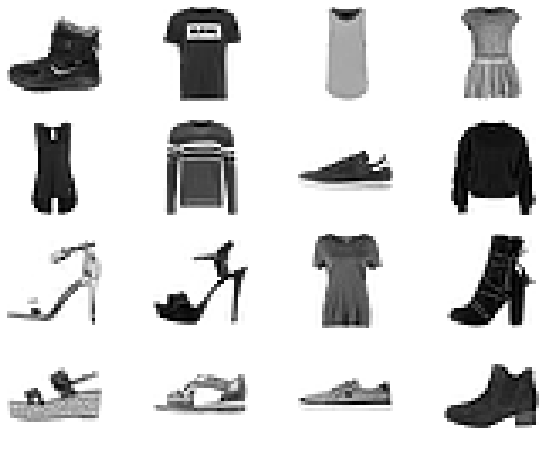

In [7]:
''' plotting some imaegs '''
plt.figure(figsize=(10, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_train[i], cmap='binary')
    plt.axis('off')
plt.show()

### **AutoEncoder Model**
- Number of nodes in any hidden layer.
- Number of hidden layers applicable for deep autoencoders.
- Activation unit such as sigmoid, tanh, softmax, and ReLU activation functions.
- Regularization parameters or weight decay terms on hidden unit weights.

In [8]:
latent_dim = 64 

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   
        
        ''' encoder '''
        self.encoder = tf.keras.Sequential([
          ''' Flattening the inuput '''
          layers.Flatten(),
          ''' Dense layer '''
          layers.Dense(latent_dim, activation='relu'),
        ])
        
        ''' decoder '''
        self.decoder = tf.keras.Sequential([
          layers.Dense(784, activation='sigmoid'),
          layers.Reshape((28, 28))
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)

In [9]:
''' intializing the loss and the optimizer '''
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [12]:
''' training '''
autoencoder.fit(X_train, X_train, epochs=20, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.0398 - val_loss: 0.0134
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0124 - val_loss: 0.0107
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0105 - val_loss: 0.0099
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0097 - val_loss: 0.0095
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0093 - val_loss: 0.0092
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.00

### **Now that the model is trained, let's test it by encoding and decoding images from the test set.**

In [13]:
encoded_imgs = autoencoder.encoder(X_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

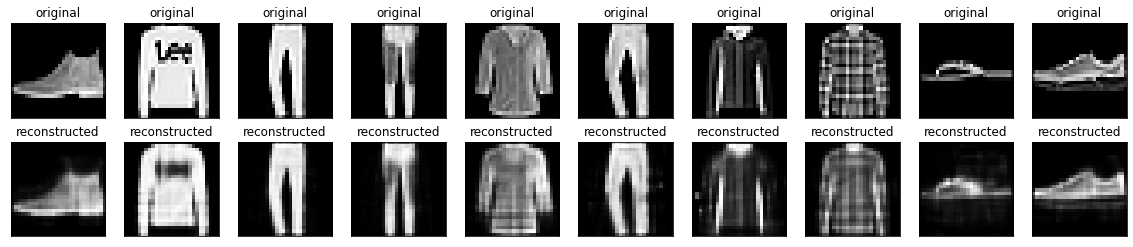

In [15]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()